In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))
from visualisation import shots_goals, Distance_goals, Distance_goals_shots, Offensive_coords, Taux_ligue, Taux_team
data_1=pd.read_csv('../data/derivatives/dataframe.csv')

/home/user/Documents/DataScience/ift6758-A08/scripts/visualisation.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(indice[i], (result['Total'][i]), f'{result["Efficacité"][i]:.2f}%', ha='center', va='center', color='black')


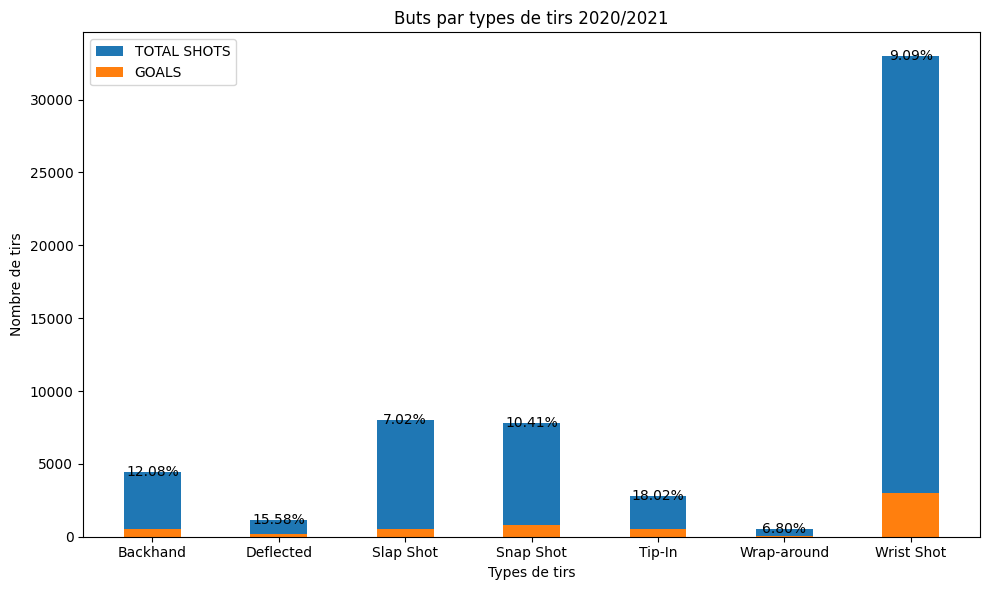

In [2]:
shots_goals (data_1, 2020, log=False)

/home/user/Documents/DataScience/ift6758-A08/scripts/visualisation.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(indice[i], (result['Total'][i]), f'{result["Efficacité"][i]:.2f}%', ha='center', va='center', color='black')


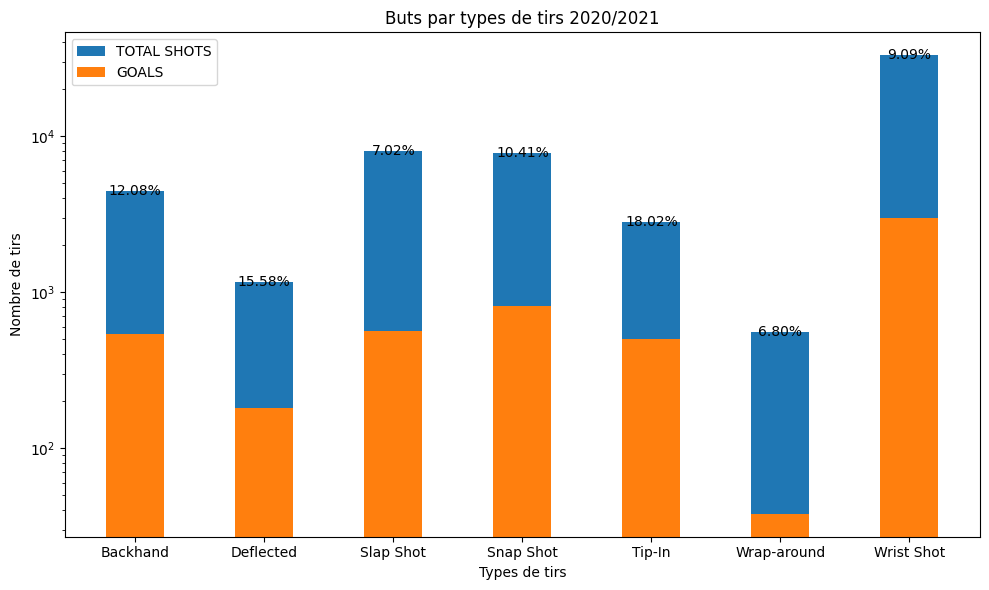

In [2]:
shots_goals (data_1, 2020, log=True)

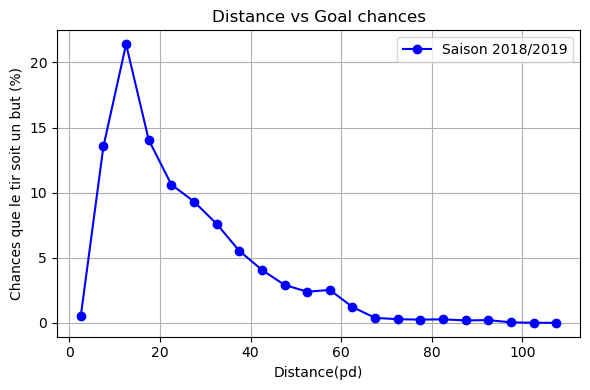

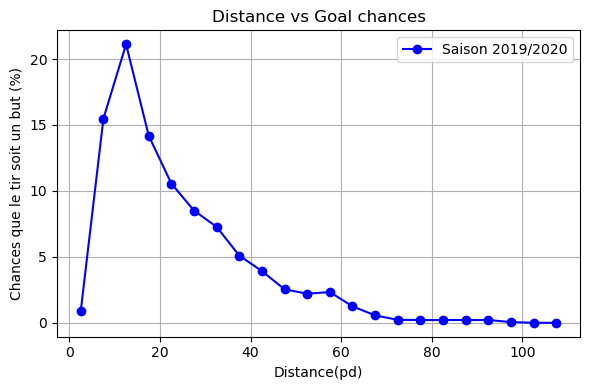

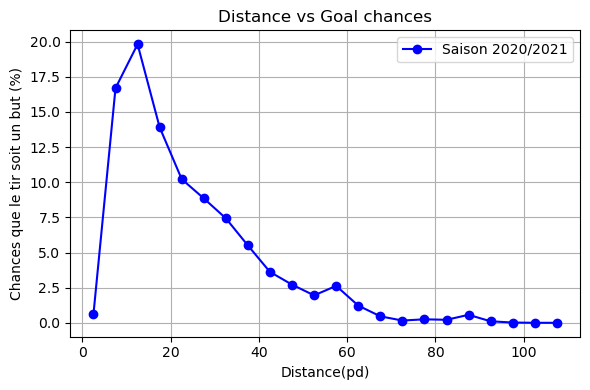

In [3]:
Distance_goals(data_1, 2018)
Distance_goals(data_1, 2019)
Distance_goals(data_1, 2020)

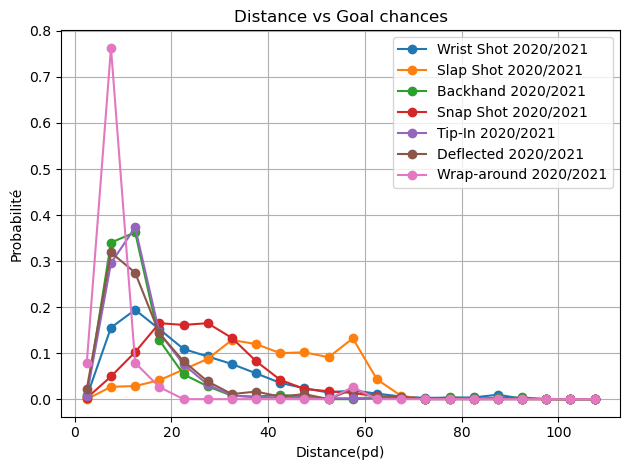

In [4]:
Distance_goals_shots(data_1, 2020)

# dt contient tout les coordonnées ramenées à la zone offensive

In [ ]:
data_2 = Offensive_coords(data_1)

# les lignes contenant les valeurs aberrantes :

In [ ]:
dt_f=data_2[data_2['new_x']>=0]

# Taux de tir moyen par heure de la ligue par emplacement

In [ ]:
Ligue = Taux_ligue(dt_f, 2016)

In [ ]:
team = Taux_team(dt_f, 'Colorado Avalanche', 2016)
result = []

for i in range(len(team)):
    sublist_result = [team[i][j] - Ligue[i][j] for j in range(len(team[i]))]
    result.append(sublist_result)

In [ ]:
import matplotlib.colors as mcolors

# Charger l'image du terrain de hockey
im = plt.imread('../figures/zone_offensive.png')

fig, ax = plt.subplots(figsize=(6, 6))

width_rink = 42.5
height_rink = 90


#ax.imshow(im, extent=[0, 42.5, 100, 0])

[x,y] = np.round(np.meshgrid(np.linspace(0,90,17),np.linspace(-42.5,42.5,18)))

ax = ax.contourf(x,y,result,alpha = 1, cmap='bwr', 
        levels = np.linspace(np.min(result),np.max(result),12),
        vmin=-1,
        vmax=1,
            )


fig.colorbar(ax, orientation="vertical",pad = 0.05)
plt.title('Densité des tirs au hockey: Saison 2020-2021')
plt.show()

In [ ]:
import matplotlib.colors as mcolors

# Charger l'image du terrain de hockey
im = plt.imread('../figures/zone_offensive.png')

fig, ax = plt.subplots(figsize=(6, 6))

width_rink = 42.5
height_rink = 90

[x,y] = np.round(np.meshgrid(np.linspace(0,90,17),np.linspace(-42.5,42.5,18)))

ax = ax.contourf(x, y,Ligue,alpha = 1, cmap='bwr', 
        levels = np.linspace(np.min(Ligue),np.max(Ligue),12),
        vmin=-1,
        vmax=1,
            )
fig.colorbar(ax, orientation="vertical",pad = 0.05)


plt.title('Densité des tirs au hockey')
plt.show()

In [ ]:
import plotly.graph_objects as go